In [1]:
import pandas as pd
import numpy as np
import torch 
import tqdm
from sklearn.model_selection import train_test_split
import glob, os, pickle
from matplotlib import pyplot as plt

In [2]:
pd.__version__

'1.3.5'

In [3]:
torch.cuda.is_available()

True

# Understand the df 

In [21]:
#first, just try and understand what a .pkl file looks like, as well as how the WSI looks. 

df = pd.read_pickle("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2/109_A1c_ASAP_tumor_map.pkl")

In [22]:
df # so each tumor map contains many, many smaller image patches (~42k patches, to be precise)

,ID,x,y,patch_size,annotation,y_true,inflamm,scc
0,109_A1c_ASAP,1024,16640,256,0,0,0,0
1,109_A1c_ASAP,1280,15872,256,0,0,0,0
2,109_A1c_ASAP,1280,16128,256,0,0,0,0
3,109_A1c_ASAP,1280,16384,256,0,0,0,0
4,109_A1c_ASAP,1280,16640,256,0,0,0,0
...,...,...,...,...,...,...,...,...
41290,109_A1c_ASAP,98560,25600,256,0,0,0,0
41291,109_A1c_ASAP,98560,25856,256,0,0,0,0
41292,109_A1c_ASAP,98560,26112,256,0,0,0,0
41293,109_A1c_ASAP,98560,26368,256,0,0,0,0


In [24]:
print("In this given tumor map (slide), %f %% of patches that do not have scc, and %f %% that do." %(sum(df["scc"] == False)/len(df["scc"])*100, sum(df["scc"] == True)/len(df["scc"])*100))

In this given tumor map (slide), 99.367962 % of patches that do not have scc, and 0.632038 % that do.


In [7]:
sum(df["scc"] == True) # that have scc 

261

In [8]:
print("%f %% of patches do not have inflammation." %(sum(df["inflamm"] == 0)/len(df["inflamm"])*100))

99.183921 % of patches do not have inflammation.


In [9]:
#what is annotation 
sum(df["annotation"] == "0") # I suppose this means that there are no patches with annotations here 

41295

In [10]:
#what is y true? 
sum(df["y_true"] == True)

337

# Visualize a Patch

In [11]:
#find the locations of these smaller files
arr=np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/109_A1c_ASAP_tumor_map.npy")

In [12]:
len(arr[0][0][0]) #rgb level 

3

In [13]:
# let's try to get and visualize one of these smaller patches 
patch = arr[15]

In [14]:
patch.shape

(256, 256, 3)

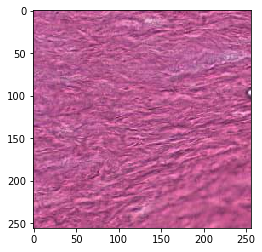

In [15]:
plt.imshow(patch, interpolation='nearest')
plt.show()

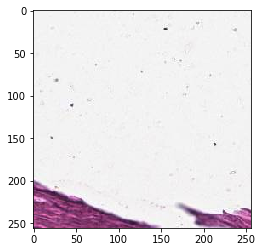

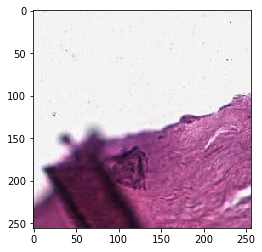

In [23]:
#visualize the first & second patches 
patch = arr[0]
patch1 = arr[1]
plt.imshow(patch, interpolation='nearest')
plt.show()
plt.imshow(patch1, interpolation='nearest')
plt.show()

# Try To Visualize the WSI 

In [20]:
#so, first we need a way of combining all of the patches into one mega np array 
def combine_image(images):
    

,ID,x,y,patch_size,annotation,y_true,inflamm,scc
0,109_A1c_ASAP,1024,16640,256,0,0,0,0
8,109_A1c_ASAP,1280,17664,256,0,0,0,0
6,109_A1c_ASAP,1280,17152,256,0,0,0,0
5,109_A1c_ASAP,1280,16896,256,0,0,0,0
9,109_A1c_ASAP,1280,17920,256,0,0,0,0
...,...,...,...,...,...,...,...,...
41247,109_A1c_ASAP,98560,14592,256,0,0,0,0
41268,109_A1c_ASAP,98560,19968,256,0,0,0,0
41287,109_A1c_ASAP,98560,24832,256,0,0,0,0
41284,109_A1c_ASAP,98560,24064,256,0,0,0,0


# Further notes

- One thing to note is that unless more than 20% of the patches in a slide have tumour, we do not say that the slide has cancer (per sophie's inital code). 
- Sophie only uses a limited subset of the total available data to train her ResNet50 model 
- Annotations might be visualizable